---
**Autor**: Profs. Dino Magri e João Nogueira

**Contato**: `professor.dinomagri@gmail.com`, `joaonogueira@fisica.ufc.br`

**Licença deste notebook**: 
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parte 3 - Visualização

Conhecendo os conjuntos de dados para realizar a análise exploratória.

Alguns gráficos que facilitam o entendimento das variáveis são:

- Histograma (Distribuição)
- Diagrama de dispersão (Relação entre as variáveis)
- Box-plot  (Diferenças entre grupos)
- Gráficos de linhas
- Gráfico de simetria

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/drive/MyDrive/projeto-ia-codigos/projeto-ia-datasets/preco_casas_final.csv', sep=';', encoding='utf-8')

In [9]:
df.head(3)

,zoneamento,tam_terreno,forma_terreno,qualidade_geral,condicao,ano_construcao,qualidade_aquecedor,ar_condicionado,tam_primeiro_andar,tam_segundo_andar,tam_sala_estar,qtde_quartos,qualidade_cozinha,qtde_banheiros,qtde_comodos,qtde_lareiras,qtde_carros_garagem,tam_garagem,tam_piscina,qualidade_piscina,mes_venda,ano_venda,preco
0,RL,785.03035,Reg,7,5,2003,Ex,Y,79.524968,79.339162,158.864130,3,Gd,30,8,0,2,50.910844,0.0,NotAv,2,2008,846510.0
1,RL,891.86880,Reg,6,8,1976,Ex,Y,117.243586,0.000000,117.243586,3,TA,2,6,1,2,42.735380,0.0,NotAv,5,2007,661780.0
2,RL,1045.15875,IR1,7,5,2001,Ex,Y,85.470760,80.453998,165.924758,3,Gd,2,6,1,2,56.485024,0.0,NotAv,9,2008,907410.0


In [10]:
len(df)

1458

O Pandas permite plotar gráficos utilizando um DataFrame ou Series. Isso só é possível pois ele utilizar a biblioteca ```matplotlib```.

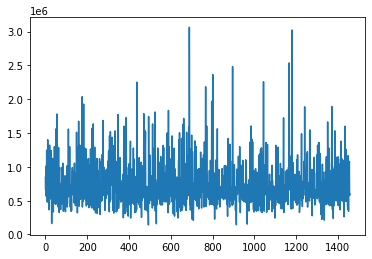

In [11]:
df['preco'].plot()

O gráfico está indexado pelo quantidade de linhas (X) dos Dataframe. Note que apenas a coluna preço foi definida, pois utilizamos ela para realizar a plotagem.

Nesse gráfico podemos tirar alguns **Insights**, o primeiro deles é que a maioria dos imóveis ficam na faixa de 600 a 700 mil reais.

Agora que sabemos o básico de como criar os gráficos iremos focar:

- Histograma (Distribuição)
- Diagrama de dispersão (Relação entre as variáveis)
- Box-plot  (Diferenças entre grupos)
- Gráficos de linhas
- Gráfico de simetria

### Histograma

Text(0, 0.5, 'Quantidade')

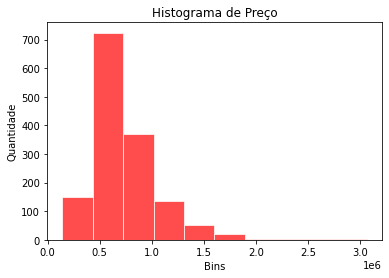

In [12]:
# Para ter uma controle maior sobre o objeto de plotagem podemos importar o módulo
# de plotagem para adicionar novos elementos.
import matplotlib.pyplot as plt

df['preco'].hist(bins=10, color='red', alpha=0.7, 
                  grid=False, edgecolor='white', linewidth=1)
plt.title('Histograma de Preço' )
plt.xlabel('Bins')
plt.ylabel('Quantidade')

Também podemos criar o histograma com várias colunas:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09e56a5c10>,
      dtype=object)

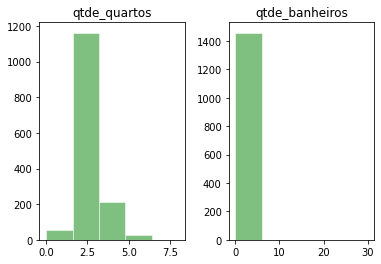

In [ ]:
df[['qtde_quartos', 'qtde_banheiros']].hist(bins=5, alpha=0.5, color='green',
                                            grid=False, edgecolor='white', linewidth=1)

### Diagrama de dispersão

Podemos utilizar o diagrama de dispersão para visualizar a relação entre as variáveis

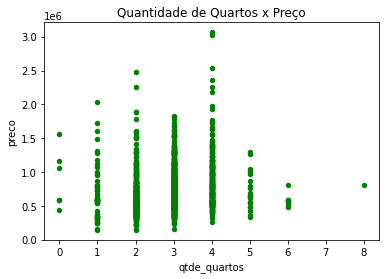

In [ ]:
df.plot(x='qtde_quartos', y='preco', 
        kind='scatter', 
        title='Quantidade de Quartos x Preço', 
        color='green')

Podemos verificar essa distribuição para todas as colunas numéricas para isso, podemos:

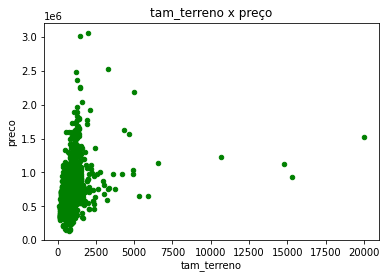

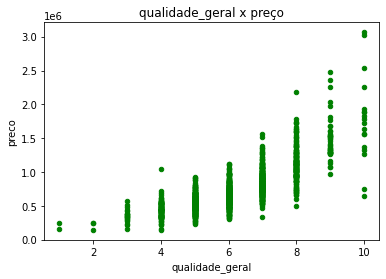

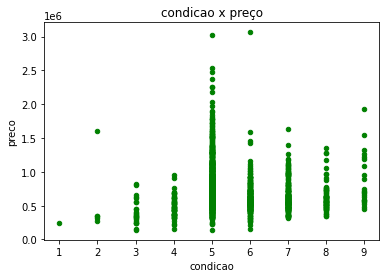

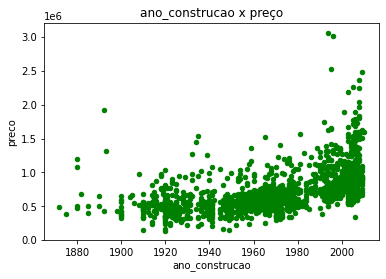

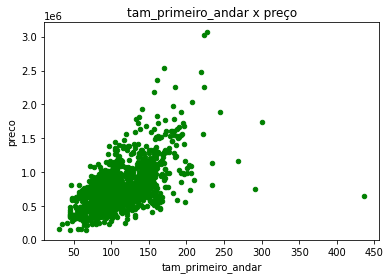

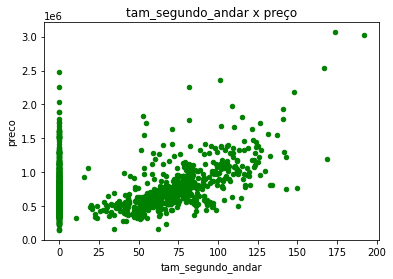

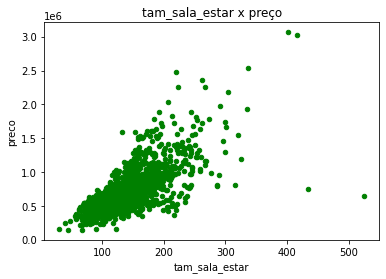

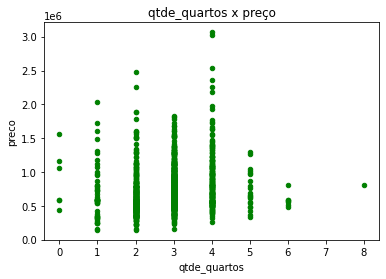

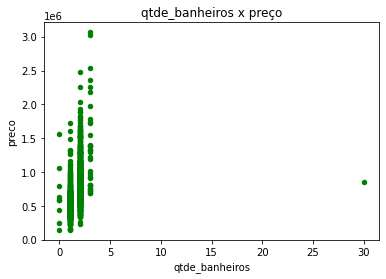

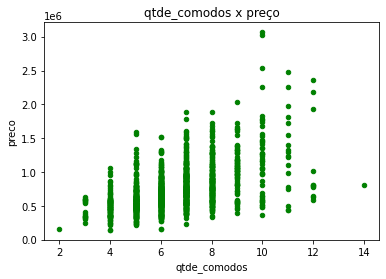

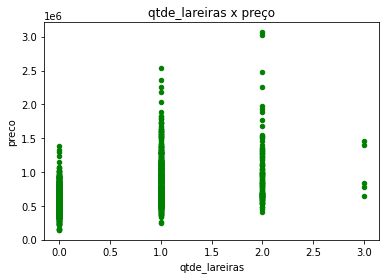

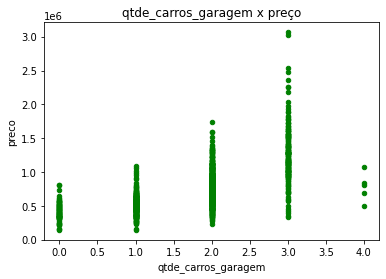

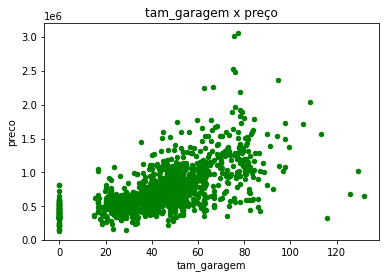

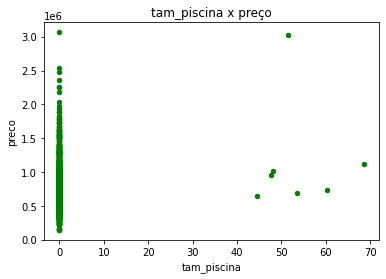

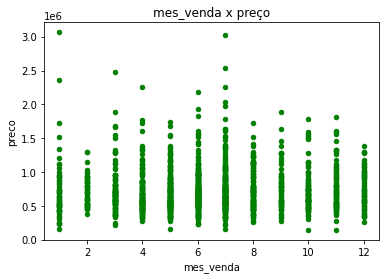

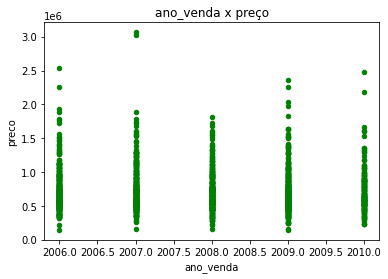

In [ ]:
for col in df.describe().columns:
    if col != 'preco':
        df.plot(x=col, y='preco', kind='scatter', title='{} x preço'.format(col), color='green')

Para facilitar a visualização, podemos utilizar a biblioteca Seaborn para facilitar a criação da visualização por pares das variáveis.

In [ ]:
import seaborn as sns

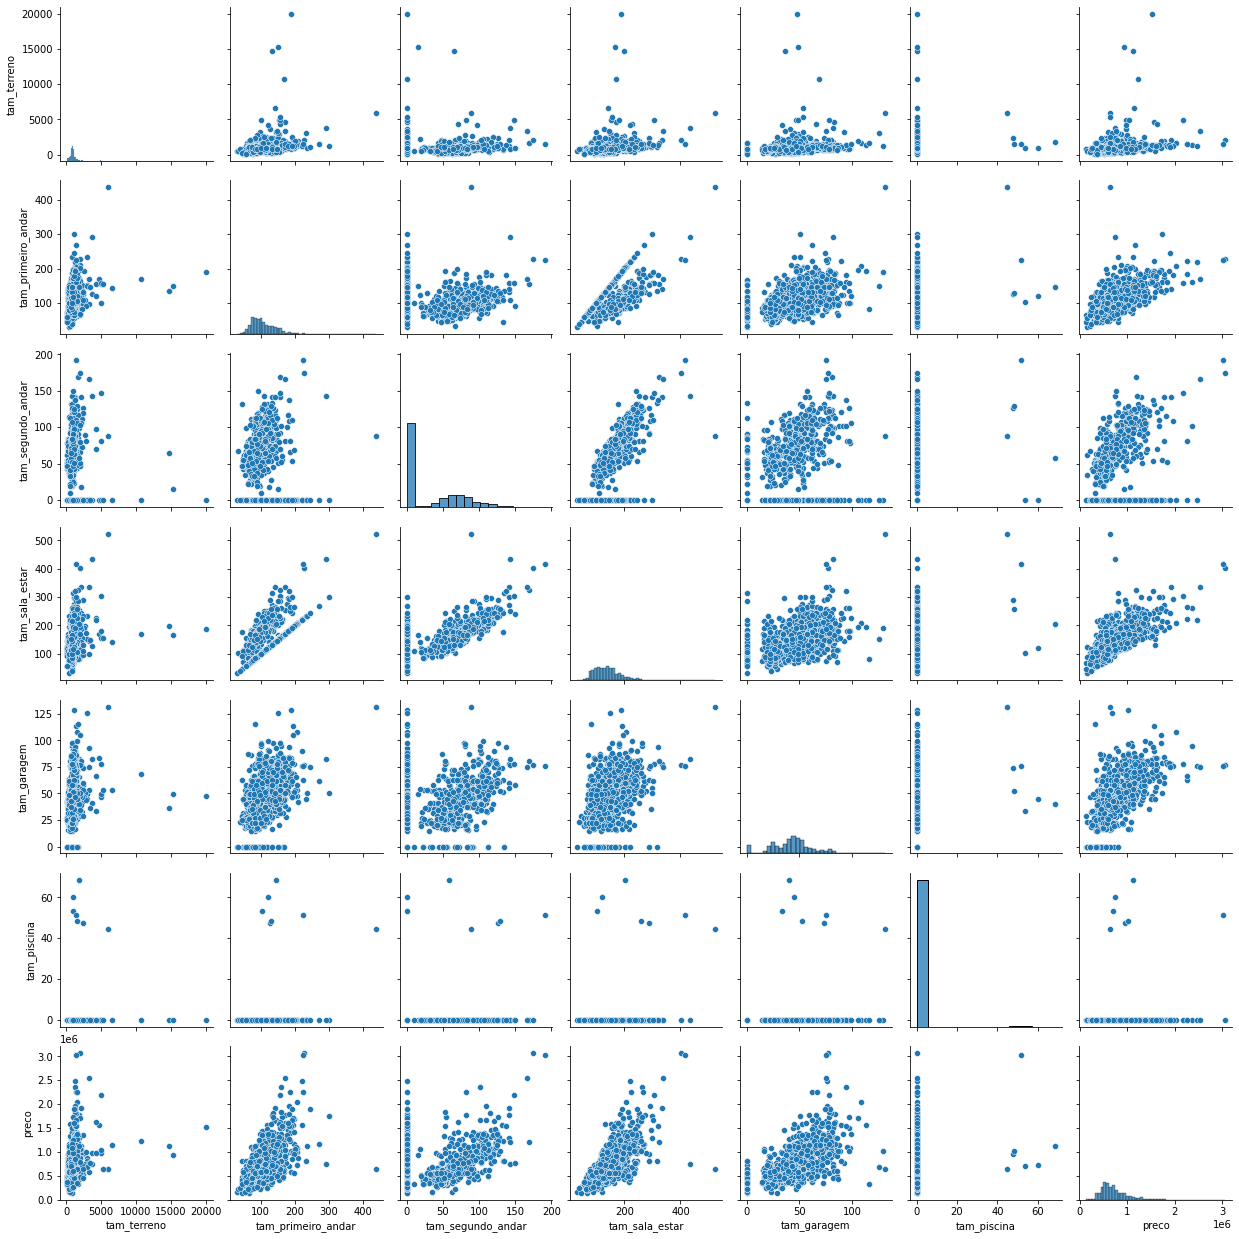

In [ ]:
sns.pairplot(df[['tam_terreno', 'tam_primeiro_andar', 
                 'tam_segundo_andar', 'tam_sala_estar',
                 'tam_garagem', 'tam_piscina', 'preco']])

### Box-Plot

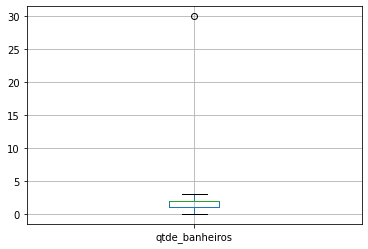

In [ ]:
df.boxplot(column='qtde_banheiros')

Esse gráfico mostra várias informações relevantes, como: o valor médio dos dados, o valor máximo e mínimo do conjunto de dados e também os **outliers**.

Como podemos visualizar que existe um ponto que se distancia bastante, esse valor é considerado um **outlier**.

Podemos plotar um gráfico do tipo BoxPlot de uma coluna agrupado por outra coluna:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


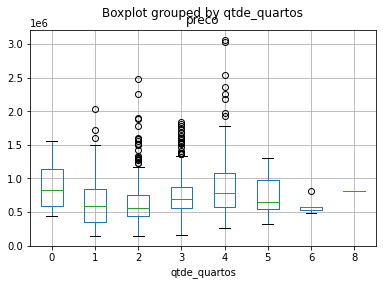

In [ ]:
df.boxplot(column='preco', by='qtde_quartos')

Esse gráfico permite visualizar os imóveis pela quantidade de quartos e seus respectivos preços.

### Correlação de Variáveis

É importante verificar se existe alguma correlação entre o número de quartos do imóvel e o seu preço?

Ou, o número de banheiros com o preço?

Para isso, podemos utilizar o método do pandas chamado corr() para que seja possível calcular a correlação entre todas as colunas do conjunto de dados.

In [ ]:
df.corr()

,tam_terreno,qualidade_geral,condicao,ano_construcao,tam_primeiro_andar,tam_segundo_andar,tam_sala_estar,qtde_quartos,qtde_banheiros,qtde_comodos,qtde_lareiras,qtde_carros_garagem,tam_garagem,tam_piscina,mes_venda,ano_venda,preco
tam_terreno,1.000000,0.105603,-0.005534,0.014018,0.299500,0.050629,0.263055,0.119496,0.070455,0.189868,0.271286,0.154691,0.180269,0.077688,0.001008,-0.013998,0.263848
qualidade_geral,0.105603,1.000000,-0.091513,0.571902,0.476608,0.294084,0.592356,0.100498,0.340181,0.426630,0.396505,0.600064,0.561625,0.065273,0.069950,-0.026092,0.790443
condicao,-0.005534,-0.091513,1.000000,-0.375785,-0.144244,0.029786,-0.079147,0.013483,-0.125814,-0.057093,-0.023612,-0.185363,-0.151228,-0.002009,-0.003161,0.043497,-0.077277
ano_construcao,0.014018,0.571902,-0.375785,1.000000,0.282159,0.008669,0.197980,-0.071761,0.299643,0.094568,0.147348,0.537342,0.478559,0.005003,0.011671,-0.012615,0.522173
tam_primeiro_andar,0.299500,0.476608,-0.144244,0.282159,1.000000,-0.202871,0.566740,0.127561,0.210306,0.409928,0.410615,0.439818,0.490013,0.131522,0.031436,-0.013687,0.606396
tam_segundo_andar,0.050629,0.294084,0.029786,0.008669,-0.202871,1.000000,0.686695,0.501964,0.273159,0.615630,0.193998,0.181883,0.137071,0.081731,0.033719,-0.026672,0.317854
tam_sala_estar,0.263055,0.592356,-0.079147,0.197980,0.566740,0.686695,1.000000,0.520483,0.381409,0.825181,0.461505,0.466174,0.468428,0.170475,0.049099,-0.034915,0.708128
qtde_quartos,0.119496,0.100498,0.013483,-0.071761,0.127561,0.501964,0.520483,1.000000,0.218406,0.676153,0.107082,0.084669,0.064346,0.070815,0.045645,-0.034756,0.167137
qtde_banheiros,0.070455,0.340181,-0.125814,0.299643,0.210306,0.273159,0.381409,0.218406,1.000000,0.347977,0.124769,0.284697,0.247873,0.028188,-0.000929,-0.007405,0.339621
qtde_comodos,0.189868,0.426630,-0.057093,0.094568,0.409928,0.615630,0.825181,0.676153,0.347977,1.000000,0.325787,0.361187,0.337144,0.083897,0.035910,-0.033132,0.533010


A correlação utilizada por padrão é a de Pearson.

Este coeficiente assume valores entre -1 e 1, onde um valor 1 significa uma correlação positiva perfeita entre as variáveis e um valor -1 uma correlação negativa perfeita entre as variáveis.

O valor 0 significa que não há uma correlação entre as variáveis.

Também é possível utilizar a correlação de **Spearman** que utilizar a correlação **não linear** entre as variáveis.

In [ ]:
df.corr('spearman')

,tam_terreno,qualidade_geral,condicao,ano_construcao,tam_primeiro_andar,tam_segundo_andar,tam_sala_estar,qtde_quartos,qtde_banheiros,qtde_comodos,qtde_lareiras,qtde_carros_garagem,tam_garagem,tam_piscina,mes_venda,ano_venda,preco
tam_terreno,1.000000,0.232292,-0.046439,0.102546,0.443970,0.117947,0.448281,0.337014,0.233455,0.405171,0.349747,0.339223,0.366400,0.084511,0.005475,-0.026272,0.456013
qualidade_geral,0.232292,1.000000,-0.177048,0.646965,0.408704,0.288324,0.602633,0.120228,0.575659,0.426943,0.420264,0.608052,0.540841,0.056752,0.060375,-0.024148,0.809261
condicao,-0.046439,-0.177048,1.000000,-0.416772,-0.166635,0.001890,-0.153248,-0.003041,-0.262183,-0.104402,-0.045110,-0.254346,-0.200330,-0.005636,-0.006696,0.049652,-0.128752
ano_construcao,0.102546,0.646965,-0.416772,1.000000,0.293293,0.028350,0.287677,-0.036394,0.537078,0.175861,0.174227,0.601047,0.527800,0.009054,0.017730,-0.012972,0.652121
tam_primeiro_andar,0.443970,0.408704,-0.166635,0.293293,1.000000,-0.276840,0.494629,0.140684,0.365907,0.361867,0.394869,0.450796,0.489881,0.070571,0.053682,-0.022271,0.575430
tam_segundo_andar,0.117947,0.288324,0.001890,0.028350,-0.276840,1.000000,0.642091,0.509413,0.383201,0.586356,0.187991,0.154660,0.096466,0.061466,0.042126,-0.020054,0.292524
tam_sala_estar,0.448281,0.602633,-0.153248,0.287677,0.494629,0.642091,1.000000,0.542091,0.657555,0.827557,0.480489,0.504170,0.467406,0.068356,0.079625,-0.024789,0.731010
qtde_quartos,0.337014,0.120228,-0.003041,-0.036394,0.140684,0.509413,0.542091,1.000000,0.334924,0.667241,0.141537,0.116892,0.110772,0.071849,0.049557,-0.026917,0.234058
qtde_banheiros,0.233455,0.575659,-0.262183,0.537078,0.365907,0.383201,0.657555,0.334924,1.000000,0.558100,0.266873,0.516976,0.443581,0.042226,0.064144,-0.010175,0.635191
qtde_comodos,0.405171,0.426943,-0.104402,0.175861,0.361867,0.586356,0.827557,0.667241,0.558100,1.000000,0.346388,0.385131,0.329572,0.059461,0.039035,-0.035523,0.531984


Podemos plotar esse dataframe para facilitar a visualização

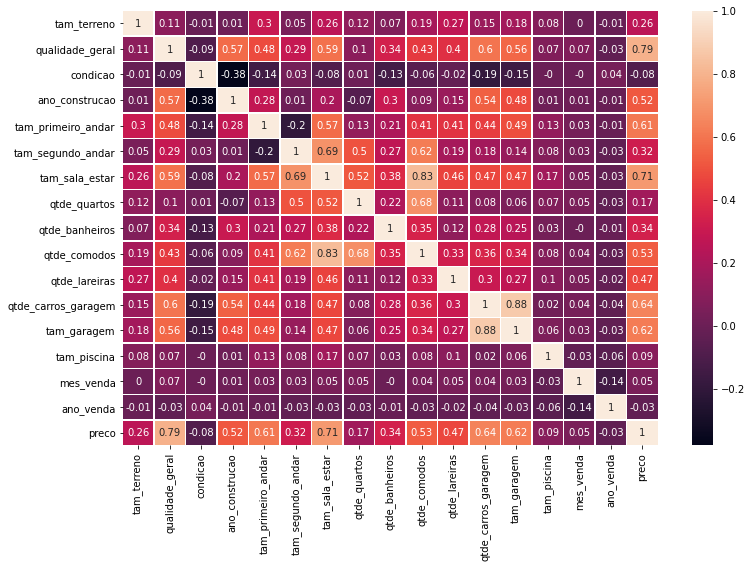

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr().round(2), annot=True, linewidths=.5);

Para facilitar o entendimento, iremos selecionar algumas variáveis:

In [ ]:
df.columns

Index(['zoneamento', 'tam_terreno', 'forma_terreno', 'qualidade_geral',
       'condicao', 'ano_construcao', 'qualidade_aquecedor', 'ar_condicionado',
       'tam_primeiro_andar', 'tam_segundo_andar', 'tam_sala_estar',
       'qtde_quartos', 'qualidade_cozinha', 'qtde_banheiros', 'qtde_comodos',
       'qtde_lareiras', 'qtde_carros_garagem', 'tam_garagem', 'tam_piscina',
       'mes_venda', 'ano_venda', 'preco'],
      dtype='object')

In [ ]:
df[['forma_terreno', 
    'ano_construcao',
    'ano_venda',
    'qtde_banheiros', 
    'qualidade_cozinha', 
    'qtde_quartos', 
    'tam_garagem', 
    'tam_sala_estar', 
    'qualidade_aquecedor', 
    'preco']].corr()

,ano_construcao,ano_venda,qtde_banheiros,qtde_quartos,tam_garagem,tam_sala_estar,preco
ano_construcao,1.000000,-0.012615,0.299643,-0.071761,0.478559,0.197980,0.522173
ano_venda,-0.012615,1.000000,-0.007405,-0.034756,-0.026448,-0.034915,-0.027336
qtde_banheiros,0.299643,-0.007405,1.000000,0.218406,0.247873,0.381409,0.339621
qtde_quartos,-0.071761,-0.034756,0.218406,1.000000,0.064346,0.520483,0.167137
tam_garagem,0.478559,-0.026448,0.247873,0.064346,1.000000,0.468428,0.623088
tam_sala_estar,0.197980,-0.034915,0.381409,0.520483,0.468428,1.000000,0.708128
preco,0.522173,-0.027336,0.339621,0.167137,0.623088,0.708128,1.000000


Podemos visualizar que a variável `ano_venda` teve uma baixa correlação com o `preço`, ao contrário do tam_sala_estar.

### Tabulação Cruzada (crosstab)

Podemos utilizar essa funcionalidade para cruzar os valores das variáveis.

In [ ]:
pd.crosstab(df.qtde_quartos, df.condicao)

condicao,1,2,3,4,5,6,7,8,9
qtde_quartos,,,,,,,,,
0,0,0,0,1,3,1,0,0,1
1,1,1,3,1,31,5,3,5,0
2,0,2,7,14,195,63,57,17,3
3,0,1,7,24,462,149,112,38,11
4,0,1,6,13,117,31,28,9,7
5,0,0,2,2,8,2,4,3,0
6,0,0,0,2,4,1,0,0,0
8,0,0,0,0,0,0,1,0,0


Analisando a tabela acima vemos que o **maior** número de imoveis na condição 5 são os imóveis com 3 quartos (462).

Também podemos visualizar esses dados em um gráfico de barras.

In [ ]:
tabela = pd.crosstab(df.qtde_quartos, df.condicao)

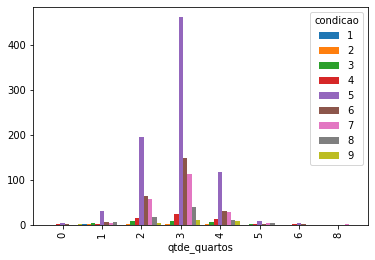

In [ ]:
tabela.plot(kind='bar', width=1.0)

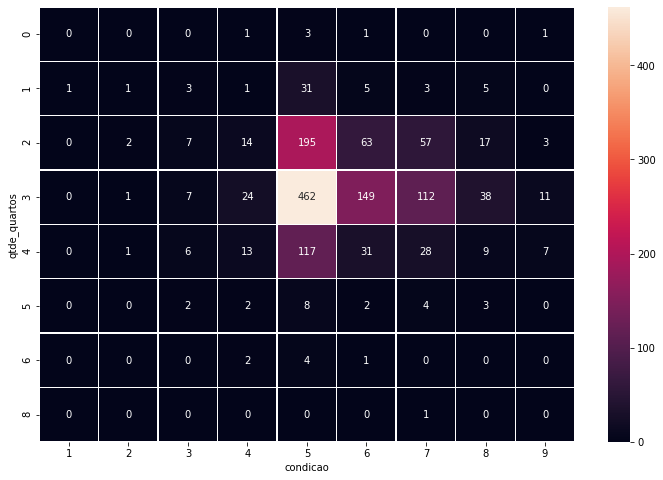

In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(tabela.round(2), annot=True, fmt='d', linewidths=.5)

# Atividade

Leitura Complementar:

[11 Simple code blocks for complete exploratory data analysis](https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd)